In [8]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage,SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI  
import os
from dotenv import load_dotenv
from typing import TypedDict,Annotated


In [3]:
load_dotenv()

True

In [4]:
def create_llm():
    api_key=os.getenv("GOOGLE_API_KEY")

    llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash",
                               api_key=api_key)
    
    return llm

In [5]:
llm=create_llm()

In [9]:
from langgraph.graph.message import add_messages

In [10]:
class ChatBot(TypedDict):

    message:Annotated[list[HumanMessage],add_messages]

    

In [26]:
def chat_bot(state:ChatBot):

    # message from state
    messages=state["message"]

    # pass to llm
    response=llm.invoke(messages)

    # append to state
    return {"message":[response]}

In [27]:
graph=StateGraph(ChatBot)

graph.add_node("Chat_bot",chat_bot)

graph.add_edge(START,"Chat_bot")
graph.add_edge("Chat_bot",END)

workflow=graph.compile()

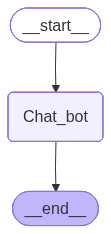

In [28]:
workflow

In [32]:
initial_state={
    "message":[HumanMessage(content="what is capital of India")]
}

workflow.invoke(initial_state)['message'][-1].content

'The capital of India is **New Delhi**.'

In [36]:
while True:
    user_input=input("You: ")
    print(user_input)

    if user_input.strip().lower() in ['bye','quit']:
        print("Bot:Thank you for chatting. Goodbye!")
        break
    else:
        result=workflow.invoke({"message":[HumanMessage(content=user_input)]})['message'][-1].content
        print("Bot :",result)

Bye
Bot:Thank you for chatting. Goodbye!
